In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('pumps.csv',\
                 index_col=0)
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [2]:
df2 = pd.read_csv('pumps_y.csv',\
                 index_col=0)

In [3]:
df3 = df2.join(df)

In [4]:
print(df3.shape)

(59400, 40)


In [5]:
df3

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [6]:
print(df3.shape)

(59400, 40)


In [7]:
df3 = df3[df3.region != 'Kilimanjaro']

In [8]:
df3 = df3[df3.longitude !=0]

In [9]:
df3.shape

(53209, 40)

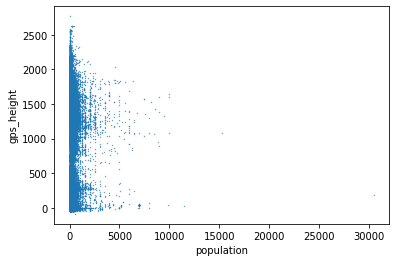

In [10]:
#df = df[df.longitude != 0]

df3.plot.scatter('population', 'gps_height', s=0.1)
#plt.axis(ymin=-12, ymax=-0.1, xmin=25, xmax=45)

In [11]:
X=df3[['population','gps_height']].to_numpy()

In [12]:
X.shape

(53209, 2)

In [13]:
X.shape

(53209, 2)

In [14]:
y=df3[['region']].to_numpy()

In [15]:
y

array([['Iringa'],
       ['Mara'],
       ['Manyara'],
       ...,
       ['Mbeya'],
       ['Dodoma'],
       ['Morogoro']], dtype=object)

In [16]:
y2 = list(y)

In [17]:
y2

[array(['Iringa'], dtype=object),
 array(['Mara'], dtype=object),
 array(['Manyara'], dtype=object),
 array(['Mtwara'], dtype=object),
 array(['Kagera'], dtype=object),
 array(['Tanga'], dtype=object),
 array(['Shinyanga'], dtype=object),
 array(['Shinyanga'], dtype=object),
 array(['Tabora'], dtype=object),
 array(['Kagera'], dtype=object),
 array(['Pwani'], dtype=object),
 array(['Ruvuma'], dtype=object),
 array(['Shinyanga'], dtype=object),
 array(['Shinyanga'], dtype=object),
 array(['Rukwa'], dtype=object),
 array(['Iringa'], dtype=object),
 array(['Iringa'], dtype=object),
 array(['Mwanza'], dtype=object),
 array(['Iringa'], dtype=object),
 array(['Iringa'], dtype=object),
 array(['Iringa'], dtype=object),
 array(['Kigoma'], dtype=object),
 array(['Lindi'], dtype=object),
 array(['Kagera'], dtype=object),
 array(['Dodoma'], dtype=object),
 array(['Pwani'], dtype=object),
 array(['Iringa'], dtype=object),
 array(['Pwani'], dtype=object),
 array(['Arusha'], dtype=object),
 array(['

In [18]:
y.shape

(53209, 1)

In [17]:
#df3 = df3[df3.status_group != 'funtional needs repair']

In [19]:
y,labels = pd.factorize(y[:,0])

In [20]:
y,labels

(array([ 0,  1,  2, ..., 16, 14, 18], dtype=int64),
 array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
        'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Rukwa', 'Mwanza',
        'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya', 'Singida',
        'Morogoro', 'Dar es Salaam'], dtype=object))

In [21]:
m = LogisticRegression(C=1e5) #Hyperparameter (regularization, W03. ignore now)
m.fit(X, y)

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print(m.score(X, y))

0.27123231032344153


In [23]:
y

array([ 0,  1,  2, ..., 16, 14, 18], dtype=int64)

In [275]:
m.coef_

array([[-4.04152690e-03,  3.77569142e-03],
       [ 5.61073194e-04,  1.47634112e-03],
       [ 2.07875691e-04,  1.68579306e-03],
       [ 3.03461879e-04, -1.18084271e-03],
       [-1.89793091e+00, -2.16496222e-02],
       [ 1.87280352e-04, -2.75044267e-04],
       [-5.29796003e-03, -2.48368188e-03],
       [-1.58904055e+00, -2.31653815e-02],
       [ 6.95890187e-04, -2.96886083e-03],
       [-8.06065965e-05,  5.22346368e-04],
       [ 2.96733822e-04,  1.62575212e-03],
       [-5.15021352e-04, -1.40057529e-03],
       [ 5.68324452e-04,  1.22874761e-03],
       [ 4.52493982e-04, -1.46308159e-03],
       [-1.63911475e+00, -2.18213948e-02],
       [ 1.00239952e-04,  1.70489394e-03],
       [-5.51526661e-01, -2.64305894e-02],
       [ 1.36207258e-04,  1.65725168e-03],
       [ 3.15384095e-04, -7.42172798e-04],
       [ 3.35460070e-04, -4.70589658e-03]])

In [276]:
m.intercept_

array([-6.21113927, -4.90283144, -5.30346797, -2.93800348, -1.48351351,
       -2.86302578, -1.54256119, -2.09536018, -2.30475221, -3.33718364,
       -5.10116414, -2.47742943, -4.19824846, -3.01743695, -1.96337696,
       -4.46159525, -1.0684461 , -4.93252014, -2.19252594, -3.40978498])

In [277]:
point = [[0.5, 3.0]]
m.predict(point)
m.predict_proba(point).round(3)

array([[0.002, 0.007, 0.005, 0.046, 0.07 , 0.05 , 0.161, 0.045, 0.083,
        0.032, 0.006, 0.071, 0.014, 0.043, 0.05 , 0.011, 0.179, 0.007,
        0.092, 0.029]])

In [278]:
from matplotlib import pyplot as plt
%matplotlib inline

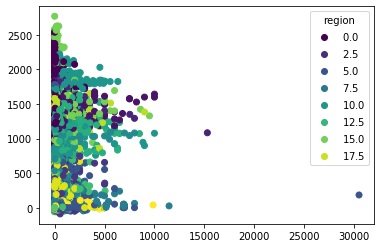

In [287]:
#fig, ax = plt.subplots()
#colors = ['b', 'c', 'y', 'm', 'r', ]
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

scatter = plt.scatter(X[:,0], X[:,1], c=y)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="region")

#legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="region")
#ax.add_artist(legend1)


#get_legend_handles_labels()

#plt.scatter(X[:,0], X[:,1], c=y)

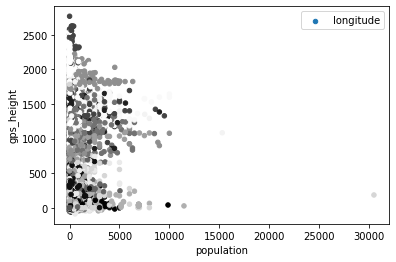

In [211]:
df3.plot.scatter('population', 'gps_height', color=y, label='longitude')

In [27]:
import seaborn as sns

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(x='y', data=df3,palette="rainbow")
plt.xticks(rotation=-45)

ValueError: Could not interpret input 'y'

<Figure size 864x576 with 0 Axes>

In [ ]:
df.reshape(-1, 1)

In [ ]:
m = LogisticRegression(C=1e5) #Hyperparameter (regularization, W03. ignore now)
m.fit('longitude', 'latitude') # find the best parameters for this data

In [ ]:
print(df2.shape)

In [ ]:
df.columns

In [ ]:
df2.columns

In [ ]:
idlist = [x for x in df.columns]

In [ ]:
df.set_axis(axis=1, labels=idlist, inplace=True)

In [ ]:
idlist2 = [x for x in df2.columns]

In [ ]:
df2.set_axis(axis=1, labels=idlist2, inplace=True)

In [ ]:
df.columns

In [ ]:
sdf = df.stack()
sdf2 = df2.stack()

In [ ]:
sdf

In [ ]:
sdf2

In [ ]:
d3 = {'id': sdf, 'status_group': sdf2}
df3 = pd.DataFrame(data=d3)

In [ ]:
df3

In [ ]:
df4=df3.stack()

In [ ]:
df4

In [ ]:
df5 = df4.unstack(0,2)

In [ ]:
df5

In [ ]:
import pylab as pyl

In [ ]:
df6 = df4.unstack(2)
